In [21]:
%matplotlib notebook
import os
import sys
sys.path.append("numpy_path")
import numpy as np
import struct
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Dense, Input
from keras.optimizers import RMSprop
import keras.callbacks as cb
from keras.callbacks import EarlyStopping, ModelCheckpoint
from mpl_toolkits import mplot3d
from keras.utils import plot_model

# define loss history
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

#plot losses
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()

def feature_scaling(X):
    X = X.T
    for i in range(7):
        mean = X[i].mean()
        std = X[i].std()
        X[i] = [(x - mean)/std for x in X[i]]
    return X.T

# input dimension
dim = 50

def init_model():
    model = Sequential()
    model.add(Dense(10, input_dim=dim))
    #model.add(Dropout(0.9))   # dropouot actually is bad in this case
    model.add(Activation('relu'))
    model.add(Dense(20))
    #model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    # use mean squared error to measure the looses
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
    return model

In [18]:
A1 = Input(shape=(30,),name='A1')
A2 = Dense(8, activation='relu',name='A2')(A1)
A3 = Dense(30, activation='relu',name='A3')(A2)

B2 = Dense(40, activation='relu',name='B2')(A2)
B3 = Dense(30, activation='relu',name='B3')(B2)

In [24]:
def inner_model():
    model = Sequential()
    model.add(Dense(10, input_dim = 1))
    model.add(Activation('relu'))
    model.add(Dense(20))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('linear'))
    # use mean squared error to measure the looses
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
    return model

In [32]:
def outer_model():
    model = Sequential()
    model.add(Dense(10, input_dim=dim))
    #model.add(Dropout(0.9))   # dropouot actually is bad in this case
    model.add(Activation('relu'))
    model.add(Dense(20))
    #model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(1))
    #model.add(Activation(1'sigmoid'))
    model.add(model1)
    # use mean squared error to measure the looses
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
    return model

In [28]:
model1 = inner_model()
history = LossHistory()
# when training, using minibatch seems to be pretty good
model.fit(train_y, train_x, epochs=500, batch_size=10,
                callbacks=[history],
                validation_data=(test_y, test_x), verbose=2)
score = model.evaluate(test_y, test_x, batch_size=20)
print(score)
plot_losses(history.losses)

Train on 30 samples, validate on 10 samples
Epoch 1/500
 - 0s - loss: 0.0306 - acc: 0.0000e+00 - val_loss: 0.0279 - val_acc: 0.0000e+00
Epoch 2/500
 - 0s - loss: 0.0306 - acc: 0.0000e+00 - val_loss: 0.0279 - val_acc: 0.0000e+00
Epoch 3/500
 - 0s - loss: 0.0306 - acc: 0.0000e+00 - val_loss: 0.0279 - val_acc: 0.0000e+00
Epoch 4/500
 - 0s - loss: 0.0306 - acc: 0.0000e+00 - val_loss: 0.0279 - val_acc: 0.0000e+00
Epoch 5/500
 - 0s - loss: 0.0306 - acc: 0.0000e+00 - val_loss: 0.0279 - val_acc: 0.0000e+00
Epoch 6/500
 - 0s - loss: 0.0306 - acc: 0.0000e+00 - val_loss: 0.0278 - val_acc: 0.0000e+00
Epoch 7/500
 - 0s - loss: 0.0306 - acc: 0.0000e+00 - val_loss: 0.0278 - val_acc: 0.0000e+00
Epoch 8/500
 - 0s - loss: 0.0306 - acc: 0.0000e+00 - val_loss: 0.0278 - val_acc: 0.0000e+00
Epoch 9/500
 - 0s - loss: 0.0305 - acc: 0.0000e+00 - val_loss: 0.0278 - val_acc: 0.0000e+00
Epoch 10/500
 - 0s - loss: 0.0305 - acc: 0.0000e+00 - val_loss: 0.0278 - val_acc: 0.0000e+00
Epoch 11/500
 - 0s - loss: 0.0305 -

Epoch 89/500
 - 0s - loss: 0.0301 - acc: 0.0000e+00 - val_loss: 0.0275 - val_acc: 0.0000e+00
Epoch 90/500
 - 0s - loss: 0.0301 - acc: 0.0000e+00 - val_loss: 0.0275 - val_acc: 0.0000e+00
Epoch 91/500
 - 0s - loss: 0.0301 - acc: 0.0000e+00 - val_loss: 0.0275 - val_acc: 0.0000e+00
Epoch 92/500
 - 0s - loss: 0.0301 - acc: 0.0000e+00 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 93/500
 - 0s - loss: 0.0301 - acc: 0.0000e+00 - val_loss: 0.0275 - val_acc: 0.0000e+00
Epoch 94/500
 - 0s - loss: 0.0301 - acc: 0.0000e+00 - val_loss: 0.0275 - val_acc: 0.0000e+00
Epoch 95/500
 - 0s - loss: 0.0301 - acc: 0.0000e+00 - val_loss: 0.0275 - val_acc: 0.0000e+00
Epoch 96/500
 - 0s - loss: 0.0301 - acc: 0.0000e+00 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 97/500
 - 0s - loss: 0.0301 - acc: 0.0000e+00 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 98/500
 - 0s - loss: 0.0301 - acc: 0.0000e+00 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 99/500
 - 0s - loss: 0.0301 - acc: 0.0000e+00 - val_loss: 0.0276

Epoch 177/500
 - 0s - loss: 0.0300 - acc: 0.0000e+00 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 178/500
 - 0s - loss: 0.0300 - acc: 0.0000e+00 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 179/500
 - 0s - loss: 0.0300 - acc: 0.0000e+00 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 180/500
 - 0s - loss: 0.0300 - acc: 0.0000e+00 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 181/500
 - 0s - loss: 0.0300 - acc: 0.0000e+00 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 182/500
 - 0s - loss: 0.0300 - acc: 0.0000e+00 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 183/500
 - 0s - loss: 0.0300 - acc: 0.0000e+00 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 184/500
 - 0s - loss: 0.0300 - acc: 0.0000e+00 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 185/500
 - 0s - loss: 0.0300 - acc: 0.0000e+00 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 186/500
 - 0s - loss: 0.0300 - acc: 0.0000e+00 - val_loss: 0.0276 - val_acc: 0.0000e+00
Epoch 187/500
 - 0s - loss: 0.0300 - acc: 0.0000e+00 - val_l

Epoch 265/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 266/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 267/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 268/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 269/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 270/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 271/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 272/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 273/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 274/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 275/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_l

Epoch 353/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 354/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 355/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 356/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 357/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 358/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 359/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 360/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 361/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 362/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 363/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_l

Epoch 441/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 442/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 443/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 444/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 445/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 446/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 447/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 448/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0277 - val_acc: 0.0000e+00
Epoch 449/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0278 - val_acc: 0.0000e+00
Epoch 450/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_loss: 0.0278 - val_acc: 0.0000e+00
Epoch 451/500
 - 0s - loss: 0.0299 - acc: 0.0000e+00 - val_l

<IPython.core.display.Javascript object>

In [34]:
model2 = outer_model()
history = LossHistory()
# when training, using minibatch seems to be pretty good
model.fit(train_x, train_x, epochs=500, batch_size=10,
                callbacks=[history],
                validation_data=(test_x, test_x), verbose=2
         )
score = model.evaluate(test_x, test_x, batch_size=20)
print(score)
plot_losses(history.losses)

ValueError: Error when checking input: expected dense_6_input to have shape (1,) but got array with shape (50,)

In [13]:
t = train_y[2]
x = model.predict(t)

<IPython.core.display.Javascript object>


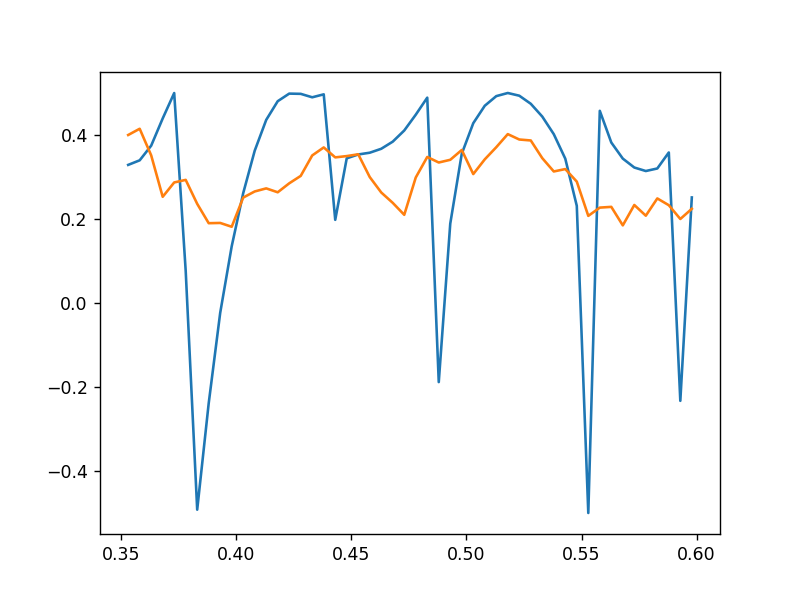

In [16]:
#predicted = np.genfromtxt('C:/Users/jeffe/Desktop/Summer_research/S4_code/R_0.40939.txt')
x_axis = raw_data[:,1][0:50]
plt.plot(x_axis, train_x[14])

plt.plot(x_axis, np.reshape(x, (50,)))
plt.show()

In [4]:
# get data from the source
raw_data = np.genfromtxt('C:/Users/jeffe/Desktop/Summer_research/cylinder/Data_r_freq.txt')
data_size = len(raw_data)
# we only need two type of data transmission and its according transmission
# initialize a 2D array (len(raw_data), 2) with all zeros
all_d = np.zeros((data_size, 2))

# calculate transmission
# formula: a**2 + b**2
for i in range(len(raw_data)):
    all_d[i, 0] = raw_data[i, 0]
    all_d[i, 1] = raw_data[i, 2]**2 + raw_data[i, 3]**2

# learn from 50 equally seperated points from spectrum
x = np.reshape(all_d[:, -1], (data_size // 50, 50))
# according radius of its spectrum
y = np.reshape(all_d[:, 0], (data_size, 1))
y_processed = []
for i in range(0, len(y), 50):
    y_processed.append(y[i])
y_processed = np.array(y_processed)

# In the original data, different spectrum was generated as radius of the cylinder increases
# We shuffled the data and ensure there's no sequence in the training or testing data
shuffled_data = np.append(y_processed, x, axis = 1)
np.random.shuffle(shuffled_data)

# extract x and y from the shuffled data
x = np.reshape(shuffled_data[:, 1:], (41, 50))
x = np.subtract(x, 0.5)
y_processed = np.reshape(shuffled_data[:, 0], (41, 1))
keras.utils.normalize(x)

train_x = x[0:30, :]
train_y = y_processed[0:30]
test_x = x[31:41, :]
test_y = y_processed[31:41]

In [ ]:
model = init_model()
history = LossHistory()
# when training, using minibatch seems to be pretty good
model.fit(train_x, train_y, epochs=500, batch_size=10,
                callbacks=[history],
                validation_data=(test_x, test_y), verbose=2)
score = model.evaluate(test_x, test_y, batch_size=20)
print(score)
plot_losses(history.losses)